In [1]:
import sys
additional = [r"C:\Users\Yan\Desktop\Robotic hand\Scripts\Online Server\core\AI",r"C:\Users\Yan\Desktop\Robotic hand\Scripts\Online Server"]
for p in additional:
    if not p in sys.path:
        sys.path.append(p)

print(sys.path)

['c:\\Users\\Yan\\Desktop\\Robotic hand\\Scripts\\VisualizeModelsFeatures', 'c:\\Users\\Yan\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'c:\\Users\\Yan\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'c:\\Users\\Yan\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'c:\\Users\\Yan\\AppData\\Local\\Programs\\Python\\Python310', '', 'C:\\Users\\Yan\\AppData\\Roaming\\Python\\Python310\\site-packages', 'c:\\Users\\Yan\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages', 'c:\\Users\\Yan\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32', 'c:\\Users\\Yan\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib', 'c:\\Users\\Yan\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin', 'C:\\Users\\Yan\\Desktop\\Robotic hand\\Scripts\\Online Server\\core\\AI', 'C:\\Users\\Yan\\Desktop\\Robotic hand\\Scripts\\Online Server']


In [2]:
# Extract convolution kernels weights

from VoxelModel.VoxelArchitecture import model

conv_weights = []

for name, param in model.named_parameters():
    # print(name, parameters)
    if name.endswith(".conv.weight"):
        print("Added name: " + name)
        conv_weights.append((name, param))


Added name: hidden_layers.0.conv.weight
Added name: hidden_layers.1.conv.weight
Added name: hidden_layers.2.conv.weight
Added name: hidden_layers.3.conv.weight
Added name: hidden_layers.4.conv.weight


In [3]:
for i in range(len(conv_weights)):
    print(conv_weights[i][0], ",  Size is : " + str(conv_weights[i][1].size()))


hidden_layers.0.conv.weight ,  Size is : torch.Size([16, 1, 5, 5, 5])
hidden_layers.1.conv.weight ,  Size is : torch.Size([32, 16, 3, 3, 3])
hidden_layers.2.conv.weight ,  Size is : torch.Size([64, 32, 3, 3, 3])
hidden_layers.3.conv.weight ,  Size is : torch.Size([32, 64, 3, 3, 3])
hidden_layers.4.conv.weight ,  Size is : torch.Size([16, 32, 3, 3, 3])


In [4]:
# create voxels

import open3d as o3d
import numpy as np

voxels_kernels = []

for j in range(len(conv_weights)):
    tens = conv_weights[i][1]
    voxel_sets = []
    for n in range(tens.size(dim=0)):
        kernel_set = tens[n]
        voxel_chanel_sets = []
        for kernel in kernel_set:
            pcd = o3d.geometry.PointCloud()
            num = kernel.detach().numpy().reshape(-1,3)
            pcd.points = o3d.utility.Vector3dVector(num)
            voxel = o3d.geometry.VoxelGrid.create_from_point_cloud(pcd, 0.5)
            voxel_chanel_sets.append(voxel)
        voxel_sets.append(voxel_chanel_sets)
    voxels_kernels.append(voxel_sets)

cubes = []

for voxel_sets in voxels_kernels:
    cubes_sets = []
    print("- Num Channel sets " + str(len(voxel_sets)))
    for voxel_chanel_sets in voxel_sets:
        channel_sets_cubes = []
        print("--- Num channels in set   " + str(len(voxel_chanel_sets)))
        for voxel in voxel_chanel_sets:
            cube = np.zeros([5,5,5])
            voxel_indices = [voxel.grid_index for voxel in voxel.get_voxels()]
            for index in voxel_indices:
                cube[tuple(index)] = 1
            channel_sets_cubes.append(cube)
            print("----- Voxel amount   " + str(len(voxel.get_voxels())))
        cubes_sets.append(channel_sets_cubes)
    cubes.append(cubes_sets)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
- Num Channel sets 16
--- Num channels in set   32
----- Voxel amount   7
----- Voxel amount   4
----- Voxel amount   5
----- Voxel amount   5
----- Voxel amount   3
----- Voxel amount   6
----- Voxel amount   6
----- Voxel amount   6
----- Voxel amount   6
----- Voxel amount   7
----- Voxel amount   6
----- Voxel amount   5
----- Voxel amount   8
----- Voxel amount   5
----- Voxel amount   5
----- Voxel amount   5
----- Voxel amount   6
----- Voxel amount   6
----- Voxel amount   7
----- Voxel amount   6
----- Voxel amount   7
----- Voxel amount   5
----- Voxel amount   6
----- Voxel amount   5
----- Voxel amount   9
----- Voxel amount   9
----- Voxel amount   6
----- Voxel amount   6
----- Voxel amount   6
----- Voxel amount   3
----- Voxel amount   7
----- Voxel amount   7
--- Num channels in set   32
----- Voxel amo

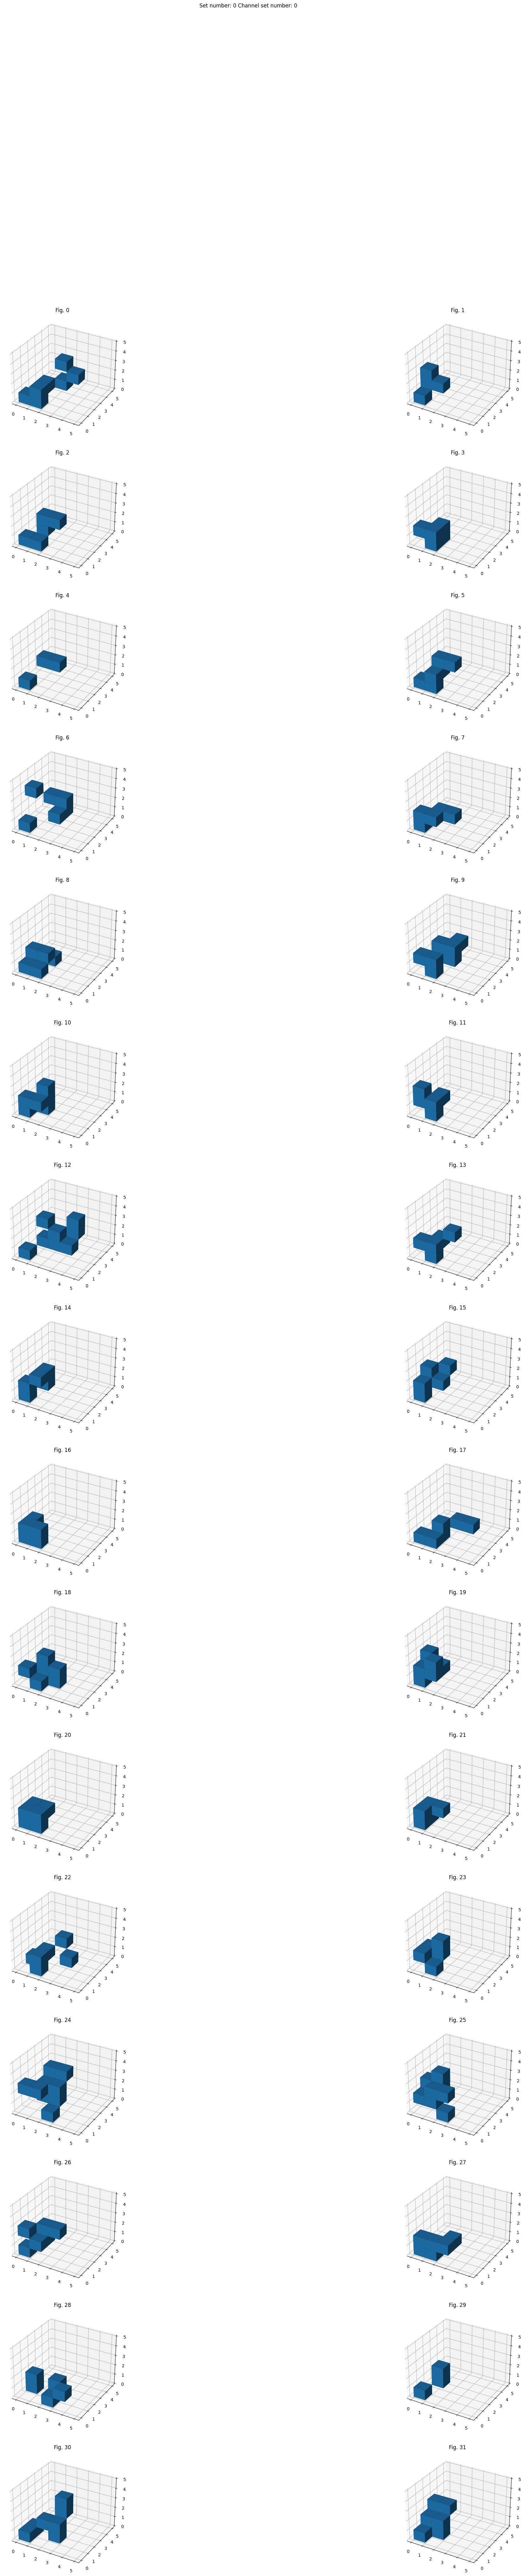

In [5]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

figure_folder = r"C:\Users\Yan\Desktop\Robotic hand\Scripts\VisualizeModelsFeatures\figures"

def plot_channel_kernels(cubes, n_set, n_channel):
    # def plot_kernels
    fig = plt.figure(figsize=(30,100))

    fig.suptitle("Set number: " + str(n_set) + " Channel set number: " + str(n_channel))
    num_cubes_to_show = len(cubes[n_set][n_channel])

    ncols=2; nrows= int(num_cubes_to_show // 2) + 1

    spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, width_ratios=[5,5])

    for i in range(num_cubes_to_show):
        cube = cubes[n_set][n_channel][i]
        axes = [5,5,5]

        colors = np.empty(axes + [4], dtype=np.float32)
        alpha = 0.9
        colors[:] = [1, 0, 0, alpha]  # red

        row = int(i / ncols)
        col = i % ncols

        ax = fig.add_subplot(spec[row,col], projection="3d")
        ax.set_title("Fig. " + str(i))
        data = cube
        ax.voxels(data)
    # plt.savefig(figure_folder + r"\\" + "S_N " + str(n_set) + " C_N " + str(n_channel))
    plt.show()

# for i in range(len(cubes)):
#     for j in range(len(cubes[i])):
#         plot_channel_kernels(cubes,i,j)
plot_channel_kernels(cubes,0,0)